In [441]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [442]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [443]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [444]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_fine_tuned.csv False 300


In [445]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 62 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01                            1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                                  1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01               1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01                   1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02                            1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03    

In [446]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
 'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
 'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.02',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.04',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.06',
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.08',
 'shenzhi-wang/Ll

In [447]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08',
  'Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.10',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.00',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.02',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.04',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.06',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.08',
  'internlm/internlm2_5-7b-chat/checkpoint-140/rpp-1.10',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.00',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.02',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.04',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.06',
  'shenzhi-wang/Llama3.1-70B-Chinese-Chat/checkpoint-210/rpp-1.08',


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 32 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00                    1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.02                    1133 non-null   object
 4   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.04                    1133 non-null   object
 5   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.06                    1133 non-null   object
 6   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.08                    1133 non-null   object
 7   Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-

In [449]:
variant = "rpp"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['Qwen/Qwen2-7B-Instruct' 'internlm/internlm2_5-7b-chat'
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat']
Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00: {'meteor': 0.445196164290933, 'sacrebleu': {'score': 15.44839843217579, 'counts': [13969, 5772, 2898, 1589], 'totals': [29048, 27915, 26782, 25650], 'precisions': [48.08936931974662, 20.677055346587856, 10.820700470465237, 6.1949317738791425], 'bp': 0.9614485375238944, 'sys_len': 29048, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.1544839843217579, 'precisions': [0.4808936931974663, 0.20677055346587855, 0.10820700470465237, 0.06194931773879142], 'brevity_penalty': 0.9614485375238944, 'length_ratio': 0.9621729049354091, 'translation_length': 29048, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4754399452742034, 'rouge2': 0.22972548922251926, 'rougeL': 0.41924101044740913, 'rougeLsum': 0.4190946773356108}, 'accuracy': 0.01412180052956752, 'correct

model   rpp    meteor     spbleu  \
0                      Qwen/Qwen2-7B-Instruct  1.00  0.445196  15.448398   
1                      Qwen/Qwen2-7B-Instruct  1.02  0.441687  15.275826   
2                      Qwen/Qwen2-7B-Instruct  1.04  0.441018  14.978039   
3                      Qwen/Qwen2-7B-Instruct  1.06  0.430463  14.216912   
4                      Qwen/Qwen2-7B-Instruct  1.08  0.422858  13.548612   
5                      Qwen/Qwen2-7B-Instruct  1.10  0.415892  13.028638   
6                internlm/internlm2_5-7b-chat  1.00  0.429150  15.096431   
7                internlm/internlm2_5-7b-chat  1.02  0.427085  14.444810   
8                internlm/internlm2_5-7b-chat  1.04  0.417029  13.695764   
9                internlm/internlm2_5-7b-chat  1.06  0.402292  12.198244   
10               internlm/internlm2_5-7b-chat  1.08  0.388262  11.099801   
11               internlm/internlm2_5-7b-chat  1.10  0.375962  10.355853   
12     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.460783  17.844903   
13     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457659  17.507110   
14     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.457504  17.558568   
15     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.451544  16.805524   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.446277  16.417393   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.438094  15.516734   
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.434412  15.359736   
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432523  15.299640   
20      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432503  15.000285   
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.426892  14.428999   
22      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420853  13.958377   
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.412435  13.262186   
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406359  13.545948   
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406512  13.356159   
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.406123  13.351680   
27  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.402115  13.109844   
28  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.397246  12.816180   
29  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.394014  12.371357   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.154484  0.419241        0.0          1.830538           1.830538   
1   0.152758  0.417589        0.0          1.136805           1.136805   
2   0.149780  0.415555        0.0          0.157988           0.157988   
3   0.142169  0.405871        0.0          0.203001           0.203001   
4   0.135486  0.397276        0.0          0.194175           0.194175   
5   0.130286  0.389757        0.0          0.177405           0.177405   
6   0.150964  0.411876        0.0          1.579876           1.579876   
7   0.144448  0.407346        0.0          1.338923           1.338923   
8   0.136958  0.398566        0.0          1.343336           1.343336   
9   0.121982  0.387323        0.0          1.349515           1.349515   
10  0.110998  0.374840        0.0          1.323919           1.323919   
11  0.103559  0.361538        0.0          0.138570           0.138570   
12  0.178449  0.434362        0.0          0.088261           0.088261   
13  0.175071  0.431253        0.0          0.092674           0.092674   
14  0.175586  0.430727        0.0          0.140335           0.140335   
15  0.168055  0.425303        0.0          0.125331           0.125331   
16  0.164174  0.421193        0.0          0.147396           0.147396   
17  0.155167  0.412076        0.0          0.105031           0.105031   
18  0.153597  0.409622        0.0          0.735216           0.735216   
19  0.152996  0.407627        0.0          0.810238           0.810238   
20  0.150003  0.406807        0.0          0.110327           0.110327   
21  0.144290  0.401400        0.0          0.132392    

In [450]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu.txt
Error processing log file: logs/l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt
Loading content of logs/openai-training-sample.jsonl


model   rpp  eval_time
6                internlm/internlm2_5-7b-chat  1.00   1.252427
7                      Qwen/Qwen2-7B-Instruct  1.00   1.078553
8   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00   1.187114
9       shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00   1.102383
10               internlm/internlm2_5-7b-chat  1.02   1.285966
11               internlm/internlm2_5-7b-chat  1.04   1.281553
12               internlm/internlm2_5-7b-chat  1.06   1.283319
13               internlm/internlm2_5-7b-chat  1.08   1.306267
14               internlm/internlm2_5-7b-chat  1.10   1.309797
15                     Qwen/Qwen2-7B-Instruct  1.02   1.046778
16                     Qwen/Qwen2-7B-Instruct  1.04   1.026478
17                     Qwen/Qwen2-7B-Instruct  1.06   1.017652
18                     Qwen/Qwen2-7B-Instruct  1.08   1.015004
19                     Qwen/Qwen2-7B-Instruct  1.10   1.023831
20  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02   1.188879
21  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04   1.179170
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06   1.173875
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08   1.175640
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10   1.181818
25      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02   1.134157
26      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04   1.100618
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06   1.090909
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08   1.100618
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10   1.107679
30     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  16.178288
31     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  15.968226
32     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  16.050309
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  15.972639
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  15.998235
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  16.018535

In [451]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model   rpp    meteor     spbleu  \
0                      Qwen/Qwen2-7B-Instruct  1.00  0.445196  15.448398   
1                      Qwen/Qwen2-7B-Instruct  1.02  0.441687  15.275826   
2                      Qwen/Qwen2-7B-Instruct  1.04  0.441018  14.978039   
3                      Qwen/Qwen2-7B-Instruct  1.06  0.430463  14.216912   
4                      Qwen/Qwen2-7B-Instruct  1.08  0.422858  13.548612   
5                      Qwen/Qwen2-7B-Instruct  1.10  0.415892  13.028638   
6                internlm/internlm2_5-7b-chat  1.00  0.429150  15.096431   
7                internlm/internlm2_5-7b-chat  1.02  0.427085  14.444810   
8                internlm/internlm2_5-7b-chat  1.04  0.417029  13.695764   
9                internlm/internlm2_5-7b-chat  1.06  0.402292  12.198244   
10               internlm/internlm2_5-7b-chat  1.08  0.388262  11.099801   
11               internlm/internlm2_5-7b-chat  1.10  0.375962  10.355853   
12     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.00  0.460783  17.844903   
13     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.02  0.457659  17.507110   
14     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.04  0.457504  17.558568   
15     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.06  0.451544  16.805524   
16     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.08  0.446277  16.417393   
17     shenzhi-wang/Llama3.1-70B-Chinese-Chat  1.10  0.438094  15.516734   
18      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.00  0.434412  15.359736   
19      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.02  0.432523  15.299640   
20      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.04  0.432503  15.000285   
21      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.06  0.426892  14.428999   
22      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.08  0.420853  13.958377   
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat  1.10  0.412435  13.262186   
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.00  0.406359  13.545948   
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.02  0.406512  13.356159   
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.04  0.406123  13.351680   
27  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.06  0.402115  13.109844   
28  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.08  0.397246  12.816180   
29  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.10  0.394014  12.371357   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.154484  0.419241        0.0          1.830538           1.830538   
1   0.152758  0.417589        0.0          1.136805           1.136805   
2   0.149780  0.415555        0.0          0.157988           0.157988   
3   0.142169  0.405871        0.0          0.203001           0.203001   
4   0.135486  0.397276        0.0          0.194175           0.194175   
5   0.130286  0.389757        0.0          0.177405           0.177405   
6   0.150964  0.411876        0.0          1.579876           1.579876   
7   0.144448  0.407346        0.0          1.338923           1.338923   
8   0.136958  0.398566        0.0          1.343336           1.343336   
9   0.121982  0.387323        0.0          1.349515           1.349515   
10  0.110998  0.374840        0.0          1.323919           1.323919   
11  0.103559  0.361538        0.0          0.138570           0.138570   
12  0.178449  0.434362        0.0          0.088261           0.088261   
13  0.175071  0.431253        0.0          0.092674           0.092674   
14  0.175586  0.430727        0.0          0.140335           0.140335   
15  0.168055  0.425303        0.0          0.125331           0.125331   
16  0.164174  0.421193        0.0          0.147396           0.147396   
17  0.155167  0.412076        0.0          0.105031           0.105031   
18  0.153597  0.409622        0.0          0.735216           0.735216   
19  0.152996  0.407627        0.0          0.810238           0.810238   
20  0.150003  0.406807        0.0          0.110327           0.110327   
21  0.144290  0.401400        0.0          0.132392    

In [452]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-7B-Instruct', 'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [453]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [454]:
model_orders = {
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [455]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_rpp(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Repetition Penalty Parameter (RPP)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.58 if len(columns) > 1 else -0.36),
    )

    plt.show()

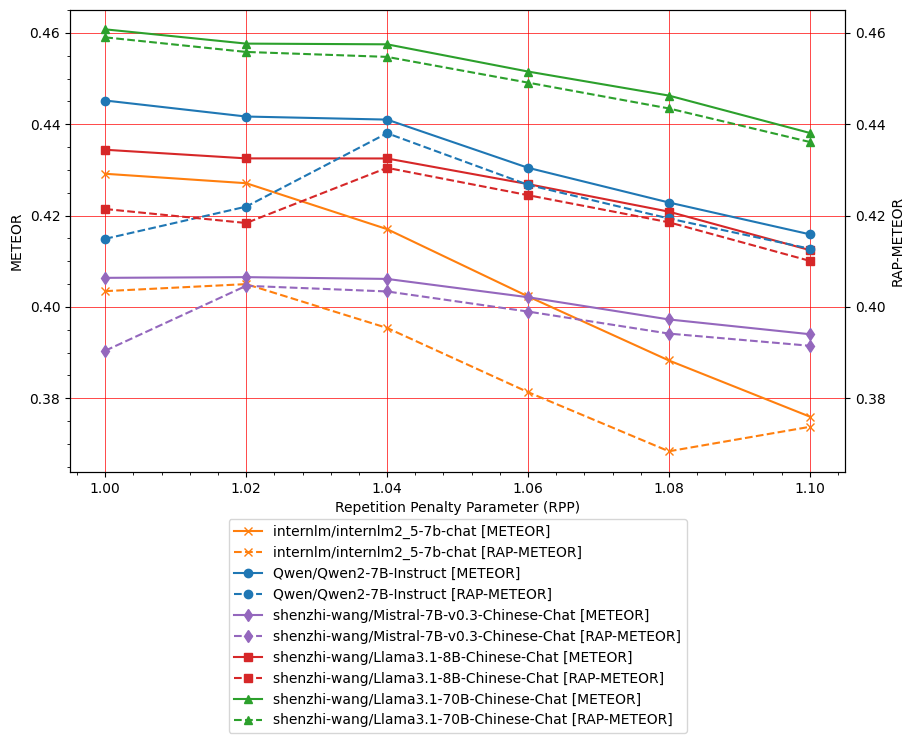

In [456]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

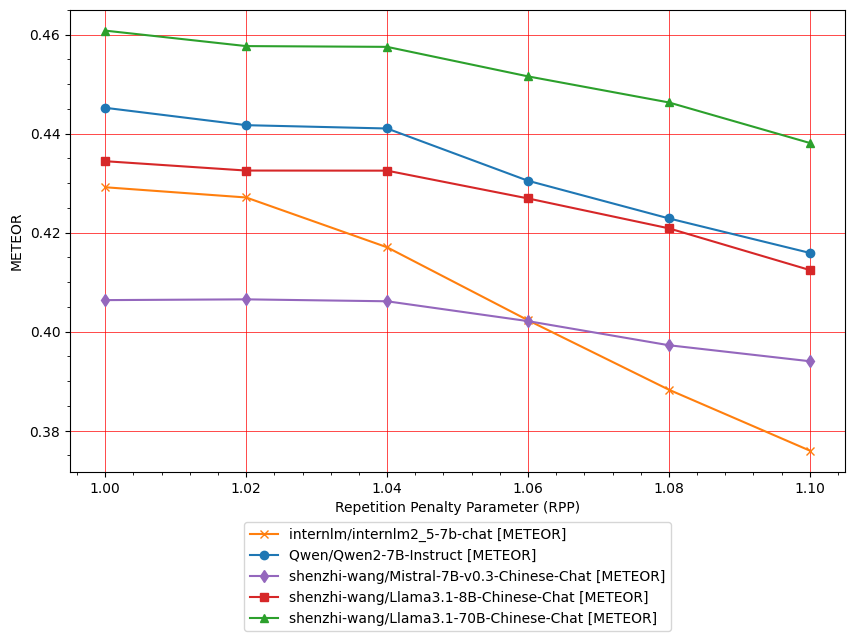

In [457]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

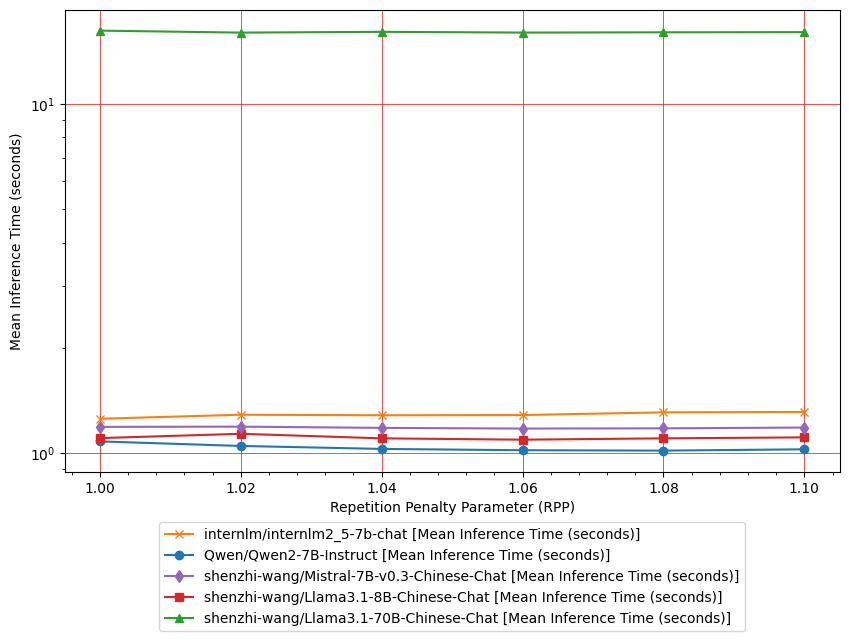

In [458]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    log_scales=[True],
)

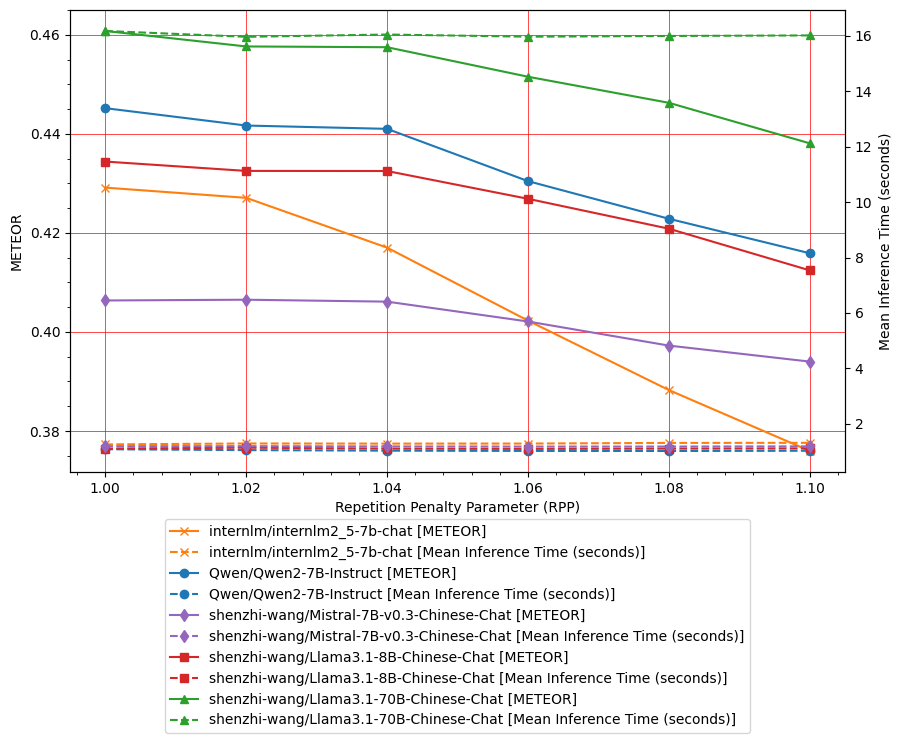

In [459]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
)

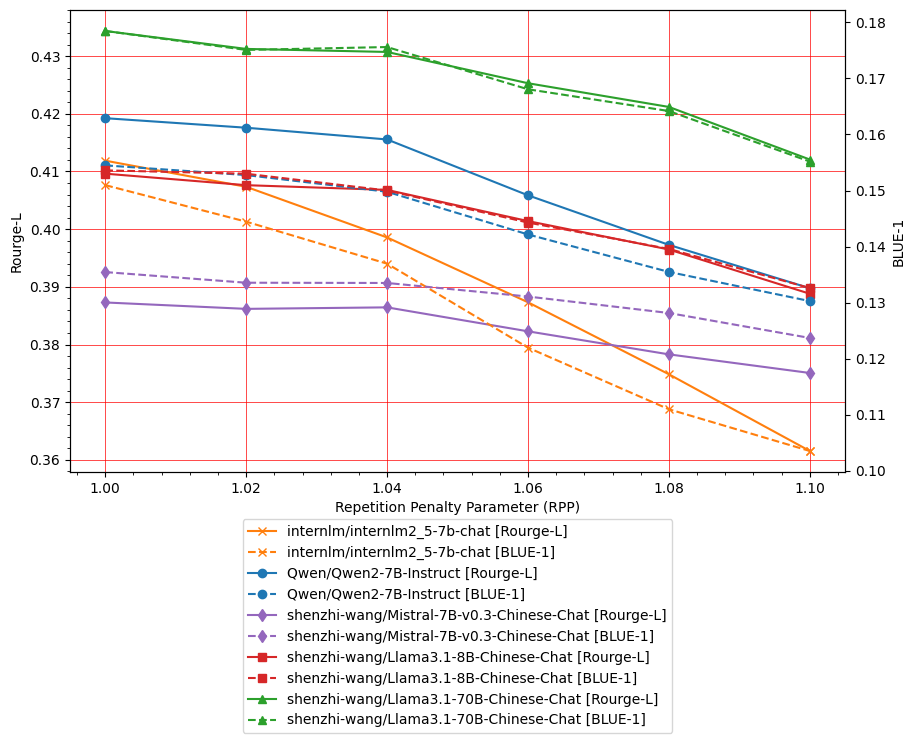

In [460]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

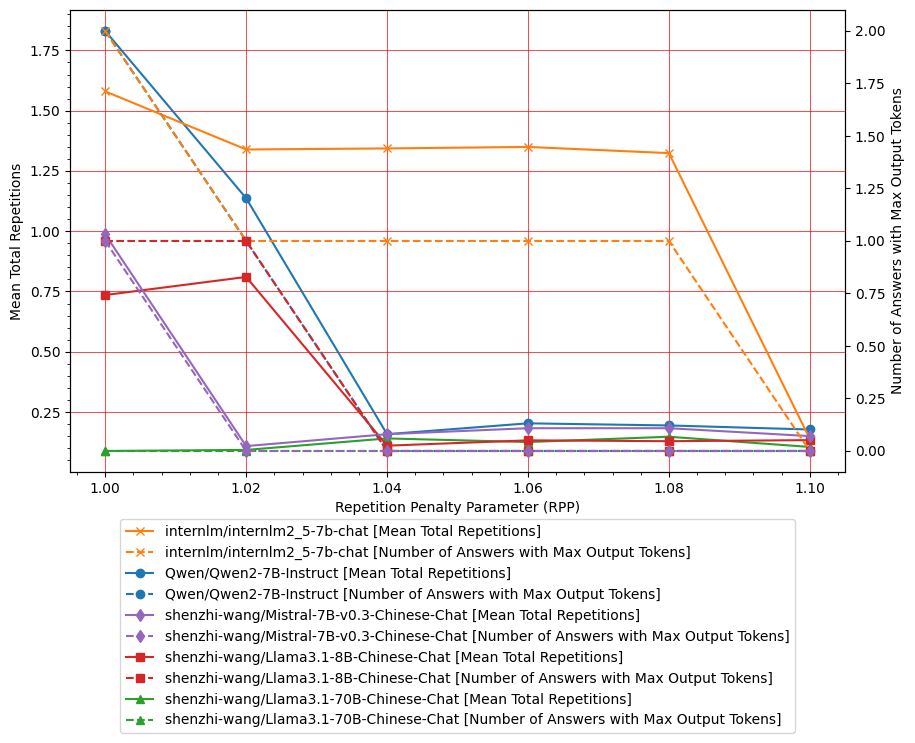

In [461]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

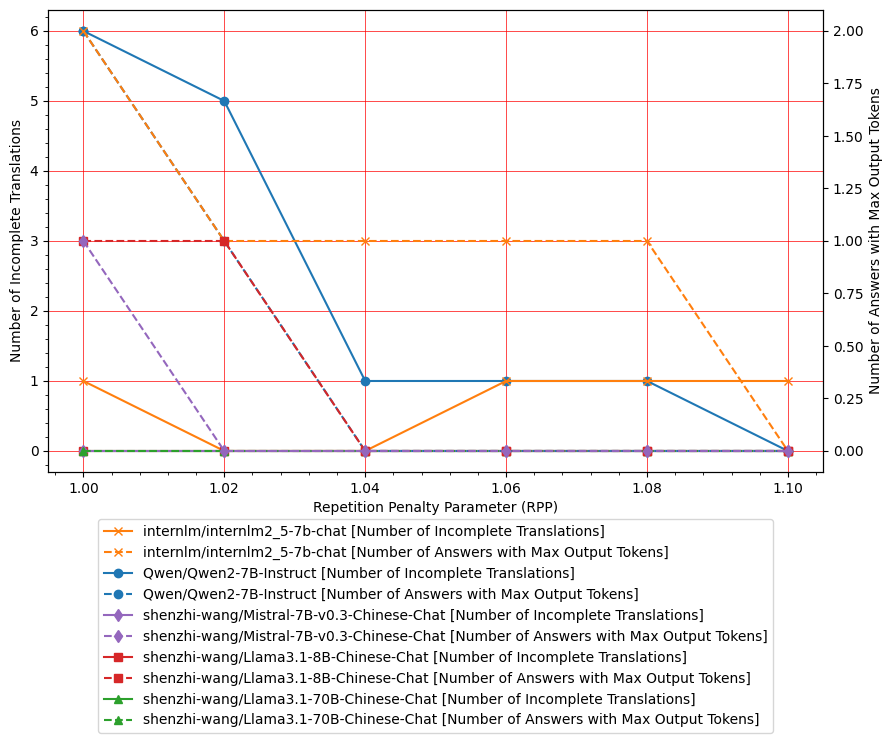

In [462]:
plot_metrics_vs_rpp(
    metrics_df,
    models,
    markers,
    ["num_incomplete_translations", "num_max_output_tokens"],
    ["Number of Incomplete Translations", "Number of Answers with Max Output Tokens"],
)

In [463]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00
*** Found 3 rows with total_repetitions > 50 for Qwen/Qwen2-7B-Instruct/checkpoint-105/rpp-1.00
钱老板道：“正是。 沐王府小公爷的嫡亲妹子。
'Young Lord Mu's little sister,' said Butcher Qian.
'Yes,' said Butcher Qian, 'it's the real thing. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's the real thing all right. It's t

In [464]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [465]:
metrics_df.describe()

meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  30.000000  30.000000  30.000000  30.000000       30.0   
mean    0.424025  14.363265   0.143633   0.401599        0.0   
std     0.021814   1.812459   0.018125   0.018642        0.0   
min     0.375962  10.355853   0.103559   0.361538        0.0   
25%     0.406397  13.284559   0.132846   0.387299        0.0   
50%     0.426989  14.322955   0.143230   0.403636        0.0   
75%     0.440287  15.344712   0.153447   0.414685        0.0   
max     0.460783  17.844903   0.178449   0.434362        0.0   

       repetition_score  total_repetitions        rap  \
count         30.000000          30.000000  30.000000   
mean           0.509738           0.509738   0.415520   
std            0.560644           0.560644   0.023838   
min            0.088261           0.088261   0.368371   
25%            0.132613           0.132613   0.400077   
50%            0.167696           0.167696   0.416637   
75%            0.942630           0.942630   0.429523   
max            1.830538           1.830538   0.459031   

       num_incomplete_translations  num_max_output_tokens  eval_time  
count                    30.000000              30.000000  30.000000  
mean                      0.600000               0.400000   4.127891  
std                       1.404426               0.621455   6.054018  
min                       0.000000               0.000000   1.015004  
25%                       0.000000               0.000000   1.100618  
50%                       0.000000               0.000000   1.180494  
75%                       1.000000               1.000000   1.301192  
max                       6.000000               2.000000  16.178288